In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px

# Sign Language EDA

Our goal is to classify American Sign Language (ASL) alphabet signs using hand landmarks.
Contrary to the initial impression of a computer vision contest, we will be working solely with tabular data.
To complete this task we are predicting the sign label based on the coordinates signals captured from images.

<img src="https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png" width="750">
<p><a href="https://developers.google.com/mediapipe/solutions/vision/hand_landmarker">reference</a></p>


## Data Sets

For our analysis, we have gathered a dataset consisting of 428,644 images from several kaggle contests depicting the 26 alphabet letters of the American Sign Language, along with images representing the "delete" and "space" signs. Each image was processed to extract the landmarks corresponding to the hand shape for the respective letter.

The hand landmarks data provides us with the x-y-z coordinates for each letter. There are a total of 21 hand landmarks, and each landmark is defined by its x, y, and z coordinates. To ensure consistency, the x and y coordinates have been normalized to a range of [0.0, 1.0] using the width and height of the image, respectively.

The z coordinate represents the depth of the landmark, with the origin set at the wrist. A smaller z value indicates that the landmark is closer to the camera. The magnitude of the z coordinate follows a similar scale to the x coordinate.

By analyzing these coordinates, we can gain insights into the hand shape and its variations for each letter in the American Sign Language.

## Creating a Combined Data set
Firstly, we will combine the landmarks information of all images, along with the corresponding letter they represent for each image.

In [2]:
# Set the desired directory path
new_directory = '/Users/ariel/Desktop/Data Science/ITC/Finalproject'
# Change the current directory
os.chdir(new_directory)

In [3]:
# Set the parent directory path where the folders with CSV files are located
parent_directory = 'Finished_Dataframes/'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through all the folders in the parent directory
for foldername in os.listdir(parent_directory):
    folder_path = os.path.join(parent_directory, foldername)

    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Iterate through all the files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.csv'):
                # Extract the letters before ".csv" as the value for the "letter" column
                letter = filename[:-4]  # Remove the ".csv" extension
                letter = letter.split('_')[-1]  # Extract the last part of the file name

                # Read each CSV file into a DataFrame
                file_path = os.path.join(folder_path, filename)

                try:
                    data = pd.read_csv(file_path)
                except pd.errors.EmptyDataError:
                    print(f"Skipping empty file: {filename}")
                    continue

                # Check if the DataFrame has any rows
                if data.empty:
                    print(f"Skipping file with no data: {filename}")
                    continue

                # Add the "letter" column to the DataFrame
                data['letter'] = letter.lower()

                # Append the data to the combined DataFrame
                combined_data = pd.concat([combined_data, data], ignore_index=True)

Skipping empty file: nothing.csv
Skipping empty file: nothing.csv


In [4]:
display(combined_data.head())
display(combined_data.tail())
combined_data.shape

image_name  x_left_0  x_left_1  x_left_2  x_left_3  x_left_4  x_left_5   
0  A1821.jpg  0.481023  0.572303  0.608389  0.573495  0.525112  0.456642  \
1  A2241.jpg  0.479932  0.563749  0.635474  0.655600  0.656166  0.597159   
2   A610.jpg  0.639837  0.710490  0.755953  0.768045  0.765065  0.711817   
3   A580.jpg  0.530418  0.608258  0.665477  0.673080  0.666699  0.603801   
4   A535.jpg  0.534936  0.604139  0.644492  0.647617  0.644056  0.594464   

   x_left_6  x_left_7  x_left_8  ...  z_left_12  z_left_13  z_left_14   
0  0.470151  0.520419  0.551390  ...  -0.107990  -0.032637  -0.116295  \
1  0.599897  0.579094  0.567782  ...  -0.057201  -0.005320  -0.046333   
2  0.712188  0.712681  0.715670  ...  -0.057976  -0.012310  -0.056183   
3  0.608733  0.604089  0.601914  ...  -0.059940  -0.009364  -0.056944   
4  0.592797  0.590428  0.591608  ...  -0.061229  -0.010663  -0.057804   

   z_left_15  z_left_16  z_left_17  z_left_18  z_left_19  z_left_20  letter  
0  -0.106064  -0.073684  -0.052842  -0.113786  -0.101525  -0.074087       a  
1  -0.043234  -0.028673  -0.012114  -0.040354  -0.031319  -0.015152       a  
2  -0.051064  -0.032643  -0.022034  -0.052286  -0.042106  -0.023853       a  
3  -0.054098  -0.034128  -0.020033  -0.044233  -0.032614  -0.013001       a  
4  -0.053430  -0.033607  -0.020277  -0.048685  -0.038495  -0.019765       a  

[5 rows x 65 columns]

image_name  x_left_0  x_left_1  x_left_2  x_left_3  x_left_4  x_left_5   
428639   Z995.jpg  0.473292  0.591244  0.679987  0.622671  0.542987  0.767049  \
428640   Z996.jpg  0.480326  0.586755  0.678375  0.629165  0.546433  0.771774   
428641   Z997.jpg  0.480874  0.591377  0.684673  0.627318  0.540687  0.769288   
428642   Z998.jpg  0.472444  0.585505  0.681033  0.621730  0.536919  0.765524   
428643   Z999.jpg  0.468378  0.579291  0.674707  0.620677  0.532285  0.766006   

        x_left_6  x_left_7  x_left_8  ...  z_left_12  z_left_13  z_left_14   
428639  0.827840  0.854735  0.882476  ...   0.604953   0.572249   0.550122  \
428640  0.831435  0.858110  0.885910  ...   0.604577   0.578914   0.555008   
428641  0.830815  0.859618  0.886764  ...   0.607889   0.576650   0.556422   
428642  0.827947  0.855269  0.884255  ...   0.602701   0.572945   0.552560   
428643  0.827668  0.856249  0.883538  ...   0.602180   0.573045   0.548508   

        z_left_15  z_left_16  z_left_17  z_left_18  z_left_19  z_left_20   
428639   0.529531   0.534666   0.487073   0.465858   0.460620   0.460334  \
428640   0.531186   0.533196   0.491942   0.468557   0.459911   0.458331   
428641   0.538899   0.540029   0.489161   0.470687   0.464621   0.461932   
428642   0.529055   0.532640   0.483666   0.463885   0.457435   0.456120   
428643   0.527653   0.531176   0.485296   0.463143   0.454887   0.453636   

        letter  
428639       z  
428640       z  
428641       z  
428642       z  
428643       z  

[5 rows x 65 columns]

(428644, 65)

## Verifying Landmark Coordinates
To verify the correctness of the landmark extraction process, we can perform a visual inspection of a few randomly selected images. By overlaying the landmarks on the images, we can assess whether the landmarks align properly with the corresponding hand features.

Let's proceed with visualizing the landmarks on a few sample images.

In [5]:
# example of an image with landmarks
# take a one image data
example_a = combined_data.loc[combined_data['image_name'] == 'A0001_test.jpg'][:1]

# coordinates of landmarks
df = pd.DataFrame({
    'x': example_a.iloc[:,1:22].values.flatten(),
    'y': example_a.iloc[:,22:43].values.flatten(),
    'z': example_a.iloc[:,43:64].values.flatten()
})

In [6]:
# interactive 3d plot of the landmarks
fig = px.scatter_3d(df, x="x", y="y", z="z", title='A', color_discrete_sequence=["red"])
fig.show()

Here we present a 3D interactive plot showcasing the spatial coordinates of the landmarks extracted from an image representing the letter 'a'.

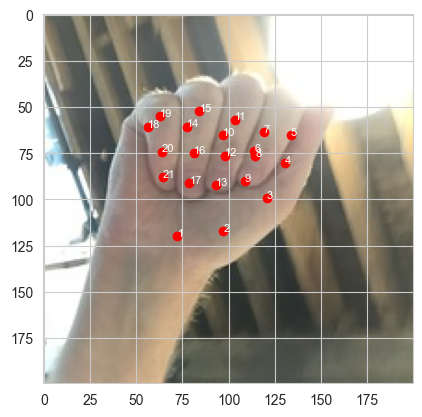

In [7]:
image_name = example_a.iloc[0]['image_name']
# Load the image
image_path = image_name
image = plt.imread(image_path)

# Get image dimensions
image_height, image_width, _ = image.shape

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Plot the landmarks
ax.scatter(df['x'] * image_width, df['y'] * image_height, color='red', marker='o')

# Add labels to the landmarks if desired
for i, landmark in df.iterrows():
    ax.text(landmark['x'] * image_width, landmark['y'] * image_height, str(i+1), color='white', fontsize=8)

# Show the image with landmarks
plt.show()


In this visualization, we have aligned the extracted landmark coordinates on the actual image of the letter 'a'. By overlaying the landmarks on the image, we can directly observe the correspondence between the spatial coordinates and their visual representation. This alignment provides a visual confirmation of the accuracy and correctness of the landmark extraction process.

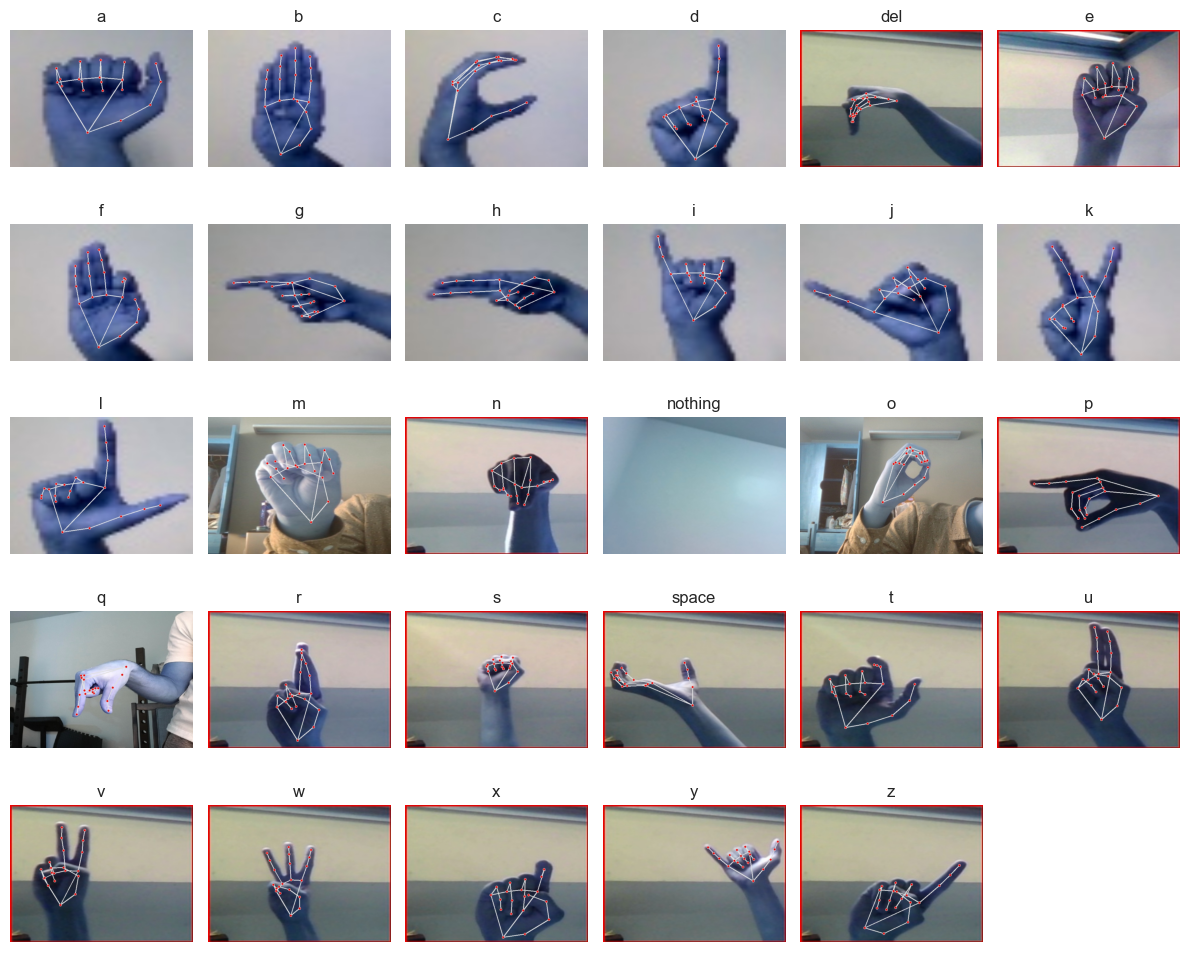

In [8]:
# random images of all of the letters we have
# Path to the folder containing the images
folder_path = 'images with landmarks'

# Create a subplot grid for displaying multiple images
num_images = 29
num_rows = 5
num_cols = 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate over all files in the folder
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if i >= num_images or not (filename.endswith('.jpg') or filename.endswith('.png')):
        continue

    # Read the image
    image_path = os.path.join(folder_path, filename)
    image = mpimg.imread(image_path)

    # Calculate the subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Extract the title from the filename
    title = filename.split('.')[0]  # Remove the extension
    title = title.split('_')[-1]  # Extract the last part of the file name

    # Display the image in the subplot
    axs[row_idx, col_idx].imshow(image)
    axs[row_idx, col_idx].axis('off')
    axs[row_idx, col_idx].set_title(title)

# Remove any empty subplots
if i < (num_rows * num_cols - 1):
    for j in range(i + 1, num_rows * num_cols):
        axs[j // num_cols, j % num_cols].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In this visualization, we have randomly selected an image from the dataset for each letter, including the 'space' and 'delete' signs. For each letter, the landmarks extracted from the image are aligned with the actual image. By overlaying the landmarks on the respective images, we can visually examine the spatial coordinates and their relationship to the hand shape and pose represented by each letter.

## Data preprocessing

First we will check for any accidentally missing or NA values in our dataset.
After confirming the absence of missing values, we will examine the distribution of data counts per letter in our dataset.
Finnaly, we will calculate and summarize key statistics for our data. These statistics include the minimum ('min'), maximum ('max'), mean ('mean'), median ('median'), standard error of the mean ('sem'), standard deviation ('std'), and count ('count'). These metrics will give us a comprehensive overview of the range, central tendency, and variability of our data across different letters.

In [9]:
# Check for NAs
display(combined_data.isna().sum().all())

False

In [10]:
# Distribution of data counts
display(combined_data['letter'].value_counts())

letter
f          21292
l          21019
k          20111
g          19744
i          19716
h          19669
v          17648
d          17215
r          17177
j          16324
u          15860
t          15764
y          15566
b          15385
o          15346
e          15222
w          15054
x          14933
s          14746
c          14557
z          13461
a          13233
p          12529
q          11886
m          11585
n          10700
space       7568
del         5308
test          18
nothing        8
Name: count, dtype: int64

We can see that there are two labels, namely "test" and "nothing," which correspond to random images within the dataset and are considered irrelevant for our analysis.
Therefore, to ensure the accuracy and relevance of our data, we will drop these labels from the data frame.

In [11]:
# drop the "letters" nothing and test
combined_data = combined_data[~combined_data['letter'].isin(['nothing', 'test'])]

In [12]:
# Remove duplicates in the "image_name" column
combined_data = combined_data.drop_duplicates(subset=['image_name'])
# Observe the final shape of the data
display(combined_data.shape)

(217655, 65)

In [13]:
# group the data by letter and add summaries for each column
data_summary = combined_data.drop('image_name', axis=1)
data_summary = data_summary.groupby('letter').agg(['min', 'max', 'mean', 'median', 'sem','std','count']).T
display(data_summary)

letter                      a            b            c            d   
x_left_0  min        0.121635     0.070849    -0.026993     0.086284  \
          max        0.929923     0.872532     0.949206     0.895731   
          mean       0.497936     0.496852     0.398954     0.467261   
          median     0.492163     0.489597     0.397516     0.472408   
          sem        0.001532     0.001429     0.001943     0.001617   
...                       ...          ...          ...          ...   
z_left_20 mean      -0.042880    -0.095166    -0.095095    -0.093875   
          median    -0.032626    -0.086597    -0.072980    -0.086775   
          sem        0.000643     0.000786     0.001140     0.000845   
          std        0.056453     0.073020     0.089581     0.072330   
          count   7705.000000  8630.000000  6170.000000  7332.000000   

letter                    del            e            f            g   
x_left_0  min        0.071255     0.123158     0.082420     0.049436  \
          max        0.925149     0.870522     0.881247     1.075750   
          mean       0.620684     0.491854     0.554695     0.631218   
          median     0.645197     0.495402     0.559989     0.652108   
          sem        0.002646     0.001706     0.001363     0.001923   
...                       ...          ...          ...          ...   
z_left_20 mean      -0.067814    -0.037952    -0.097226    -0.070008   
          median    -0.055848    -0.030592    -0.090104    -0.070991   
          sem        0.001031     0.001297     0.000929     0.001521   
          std        0.062092     0.105924     0.082448     0.127530   
          count   3624.000000  6670.000000  7876.000000  7031.000000   

letter                      h            i  ...            r            s   
x_left_0  min        0.025949     0.126988  ...     0.106129     0.110140  \
          max        1.136192     0.923158  ...     0.895840     0.946137   
          mean       0.727627     0.555878  ...     0.503986     0.513487   
          median     0.743995     0.546592  ...     0.490104     0.508828   
          sem        0.001753     0.001441  ...     0.001703     0.001669   
...                       ...          ...  ...          ...          ...   
z_left_20 mean      -0.097680    -0.043545  ...    -0.086854    -0.031253   
          median    -0.109995    -0.033405  ...    -0.074097    -0.028710   
          sem        0.001878     0.000784  ...     0.000794     0.000767   
          std        0.156933     0.076900  ...     0.077355     0.068946   
          count   6985.000000  9630.000000  ...  9491.000000  8084.000000   

letter                  space            t            u             v   
x_left_0  min       -0.056390     0.132709     0.074272      0.123996  \
          max        1.041266     0.916947     0.890617      0.928478   
          mean       0.582078     0.461869     0.521069      0.514937   
          median     0.577288     0.473789     0.526950      0.497078   
          sem        0.002471     0.001467     0.001807      0.001702   
...                       ...          ...          ...           ...   
z_left_20 mean      -0.001544    -0.023485    -0.082108     -0.089471   
          median    -0.032799    -0.016302    -0.066575     -0.070340   
          sem        0.002013     0.000855     0.001027      0.000847   
          std        0.131061     0.079248     0.095278      0.085002   
          count   4237.000000  8584.000000  8606.000000  10060.000000   

letter                      w            x            y            z  
x_left_0  min        0.140607     0.176658     0.140138     0.097587  
          max        0.907663     0.883505     0.958062     0.931317  
          mean       0.543987     0.510075     0.530183     0.410350  
          median     0.549336     0.497121     0.517053     0.409589  
          sem        0.001789     0.001511     0.001588     0.001663  
...                       ...          ...

## Data Visualization
First we will check the distribution of image counts per letter in our dataset, it will allow us to identify any imbalances or variations in the number of images per letter, which may impact our analysis and modeling.

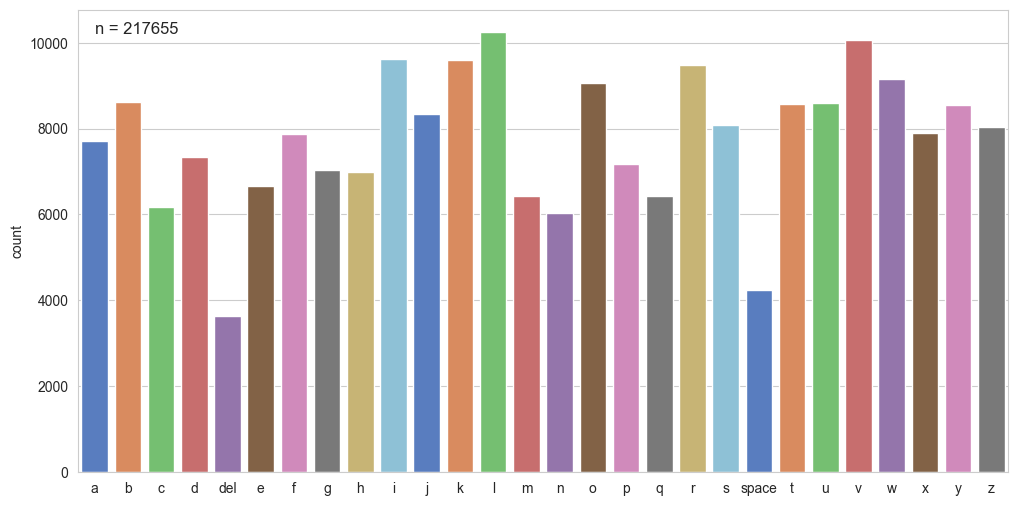

In [14]:
# plot the data counts for each letter
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='letter', data=combined_data, palette='muted')
plt.xlabel(" ")

# Add sample size n in the upper left corner
plt.text(0, 10500, f"n = {len(combined_data)}", fontsize=12, verticalalignment='top')

plt.show()

We observed variations in the frequencies of images for different letters. The letter 'del' has the lowest frequency, with approximately 3,500 images, while the letters 'I' and 'V' have the highest counts, with around 10,000 images each.
Although the 'del' class has the lowest number of images, we believe that it still provides a sufficient amount of data for training a reliable model.

## Landmark Distribution and Depth
Since the origin of the z coordinate is set at the wrist, the landmarks closer to the camera will have smaller z values, while landmarks farther away will have larger z values. By analyzing the distribution of the z coordinates, we can gain a better understanding of the spatial positioning and variability of the landmarks in our dataset. Therefor, we will exame the distribution of the z coordinates, to gain insights into how the landmarks vary across different images. Landmarks that are similar across images are expected to have a narrower distribution of z values, while landmarks that differ significantly will exhibit a wider distribution.

We will present boxplots showcasing the distribution of the z coordinate (depth) for each landmark per letter.

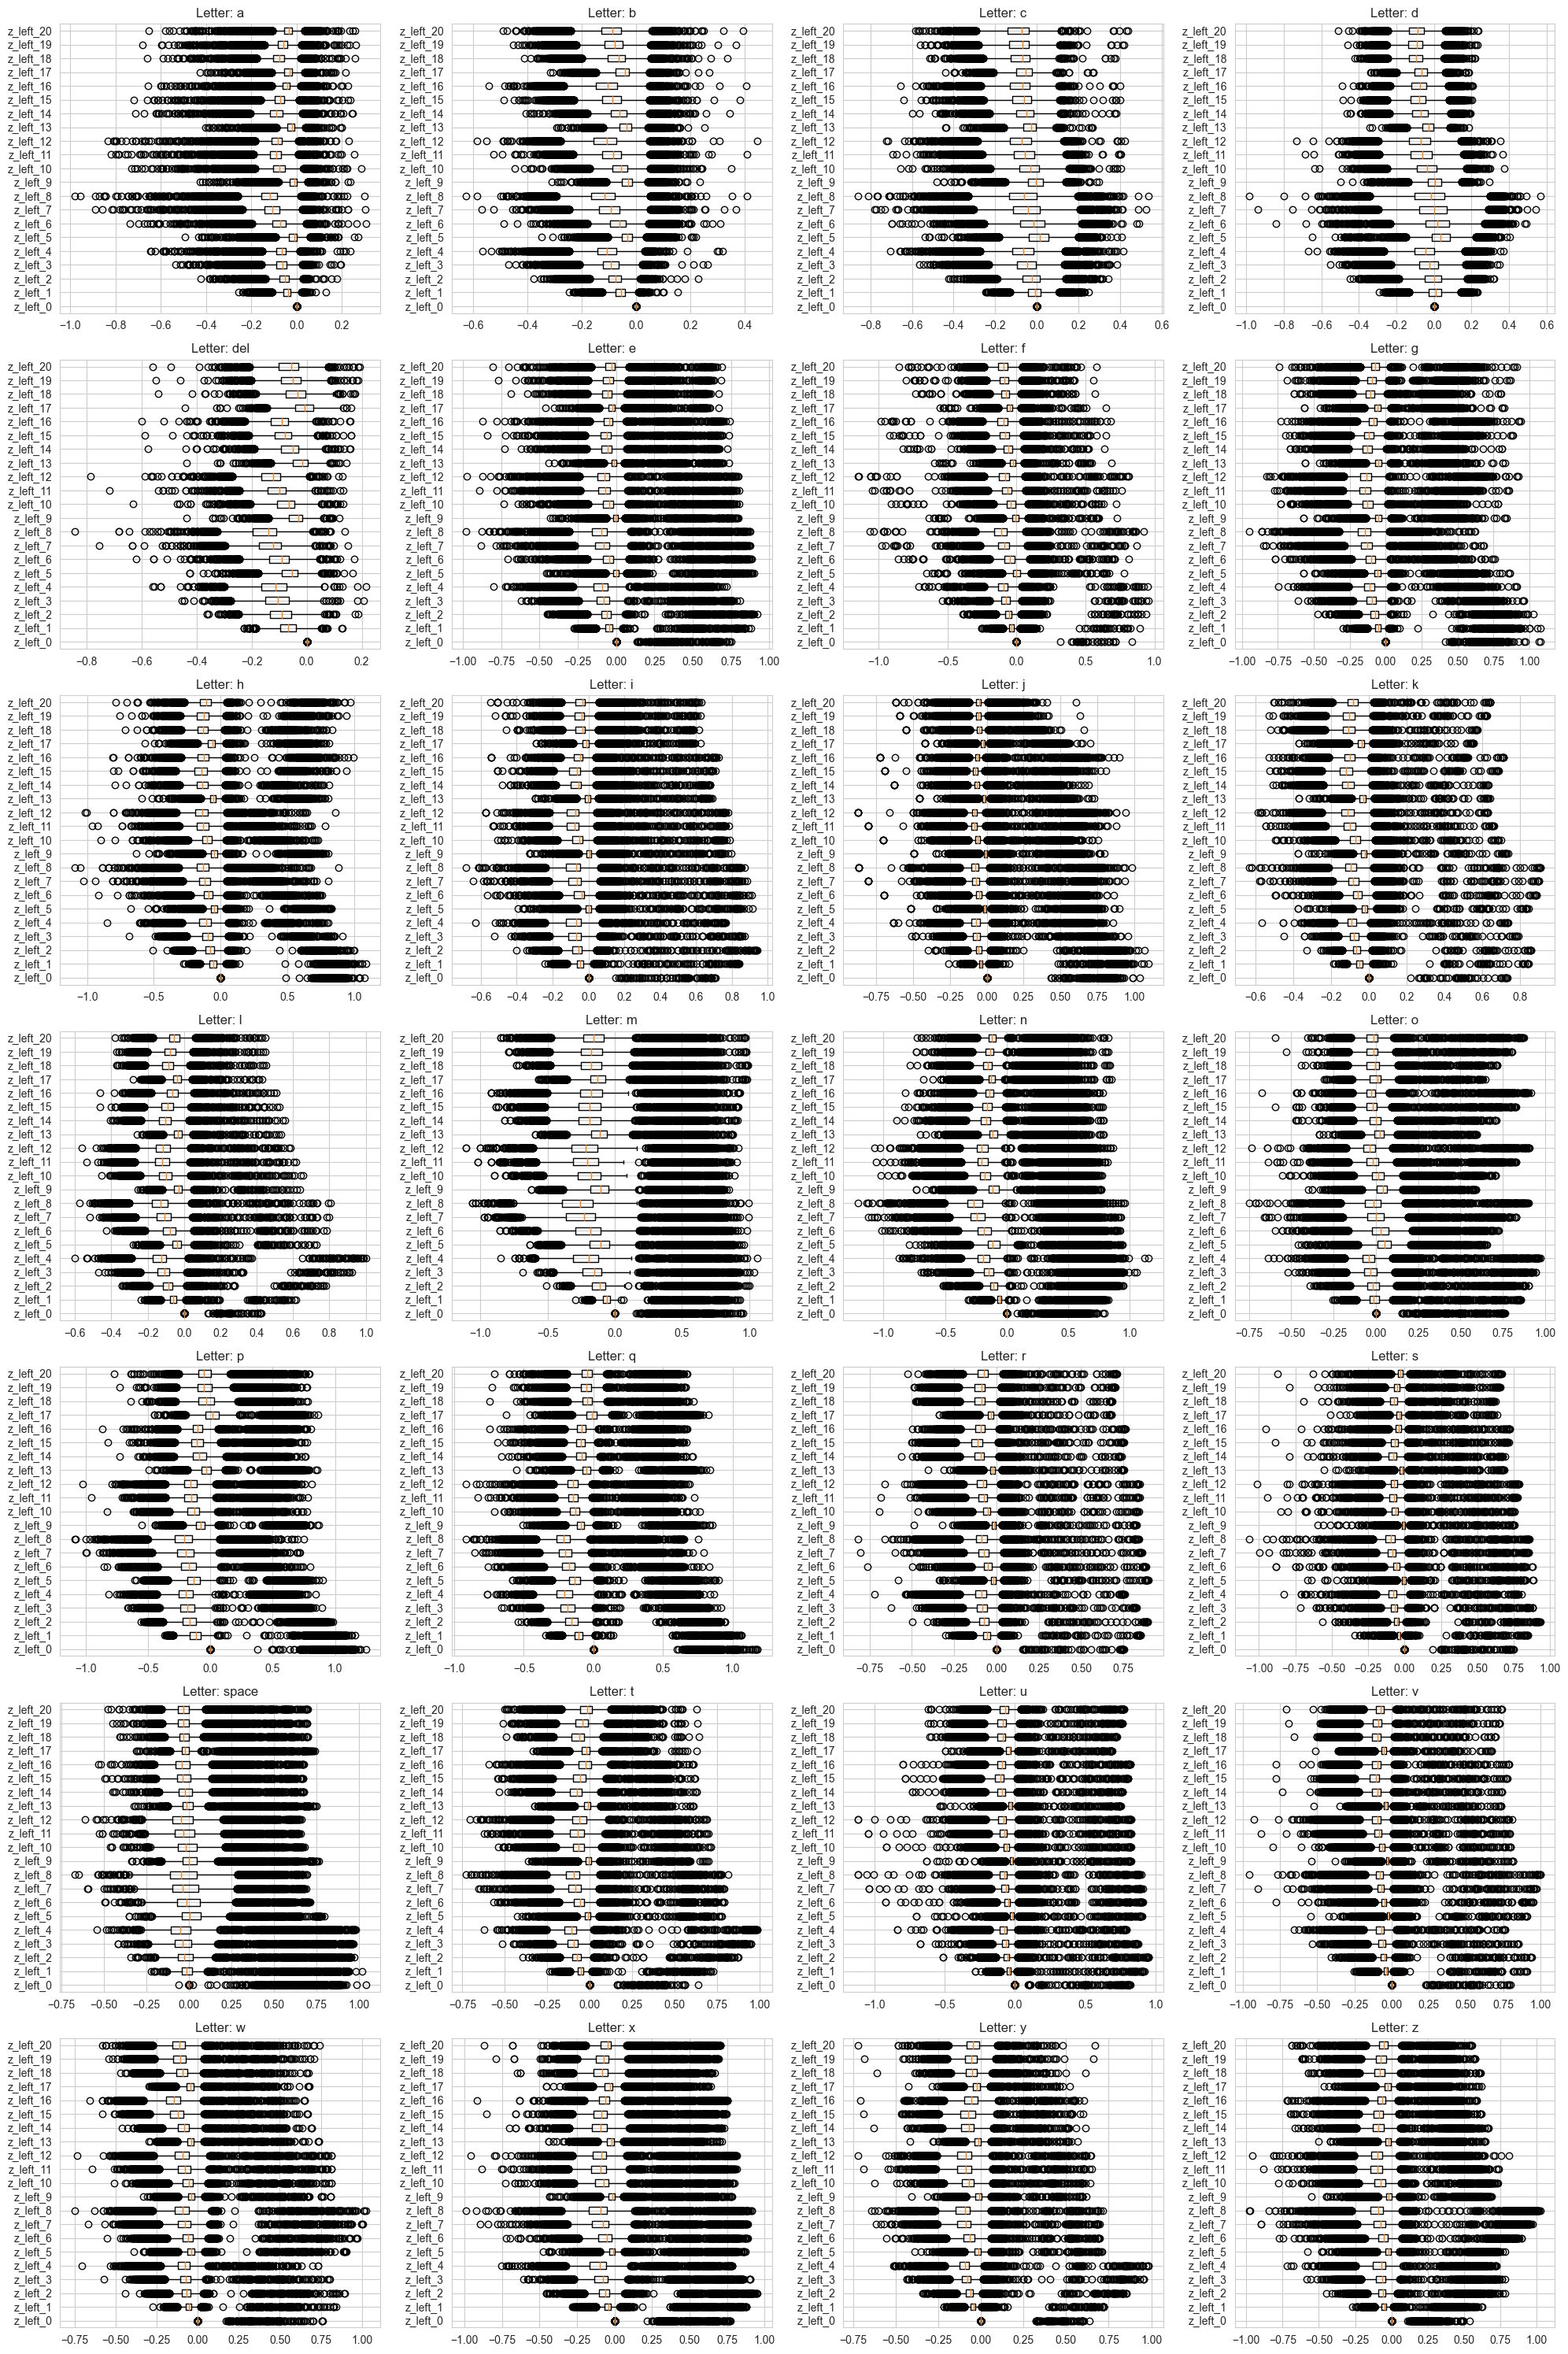

In [15]:
# Distributions for images per letter
# mean bar plots with SD

# Get the Z column names
columns = combined_data.iloc[:,43:64].columns
# Create a subplot grid for displaying multiple images
num_images = 28
num_rows = 7
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Iterate over each letter
for i, letter in enumerate(combined_data['letter'].unique()):
    # Calculate the row and column index in the subplot grid
    row = i // num_cols
    col = i % num_cols

    # Select the subplot corresponding to the current letter
    ax = axs[row, col]

    # Create a list to store the data for each column
    data = []

    # Iterate over each column
    for column in columns:
        # Get the values for the current letter and column
        values = combined_data.loc[combined_data['letter'] == letter, column]
        data.append(values)

    # Plot a box plot for each column
    ax.boxplot(data, labels=columns, vert=False)

    # Set the title and adjust the layout of the subplot
    ax.set_title(f'Letter: {letter}')
    # ax.invert_yaxis()
    # ax.yaxis.tick_left()
    # ax.xaxis.tick_bottom()

# Adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()



As anticipated, we observe significant variability in most of the landmark's depth across the images of all the letters. This diversity in depth is expected to play a crucial role in learning the distinctive patterns associated with each letter, enabling the development of a robust and accurate model for sign language classification.

# Baseline Model: Random Forest Classifier
To establish a baseline model, we will utilize the simplest Random Forest Classifier with 100 estimators. The following steps will be taken:

1. Split the data into training and testing sets.
2. Train the Random Forest Classifier on the training data.
3. Make predictions on the test set.
4. Evaluate the predictions using a confusion matrix.

By employing this baseline model, we aim to establish a starting point for performance evaluation and provide a benchmark for subsequent model improvements.

In [16]:
# splitting the data into test and train
from sklearn.model_selection import train_test_split

target = 'letter'
y = combined_data[target]
X = combined_data.drop(target, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2, # or train_size=.8
                                                    # to get same split every time
                                                    random_state=42)

In [17]:
train_image_name,test_image_name = X_train['image_name'],X_test['image_name']
X_train, X_test = X_train.drop('image_name', axis = 1), X_test.drop('image_name', axis = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174124, 63), (43531, 63), (174124,), (43531,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# Train the model
rf.fit(X_train, y_train)
# make predictions
y_pred = rf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print(report)

              precision    recall  f1-score   support

           a       0.92      0.94      0.93      1572
           b       0.94      0.98      0.96      1703
           c       0.94      0.98      0.96      1172
           d       0.91      0.96      0.93      1423
         del       0.96      0.98      0.97       736
           e       0.91      0.96      0.93      1306
           f       0.94      0.97      0.96      1564
           g       0.92      0.96      0.94      1392
           h       0.96      0.96      0.96      1308
           i       0.95      0.94      0.95      1958
           j       0.98      0.96      0.97      1693
           k       0.96      0.94      0.95      1893
           l       0.97      0.96      0.97      2058
           m       0.92      0.95      0.93      1320
           n       0.96      0.93      0.94      1200
           o       0.94      0.96      0.95      1880
           p       0.97      0.96      0.97      1488
           q       0.96    

Based on the classification report, the model achieved an overall accuracy of 95%.
Among all the classes, the letter 'q' had the highest precision of 0.98. On the other hand, the letter 'u' had the lowest precision of 0.91
In terms of recall, the letter 'b' had the highest value of 0.98. Conversely, the letter 'u' had the lowest recall of 0.88, indicating that the model missed a portion of the actual occurrences of 'u' in the data.
The letter 'del' achieved the highest F1-score of 0.97, indicating a good balance between precision and recall for this class.
Overall, the model performs well with high accuracy and balanced F1-scores across most classes. However, it exhibits slightly lower precision and recall for the letter 'u'.